# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

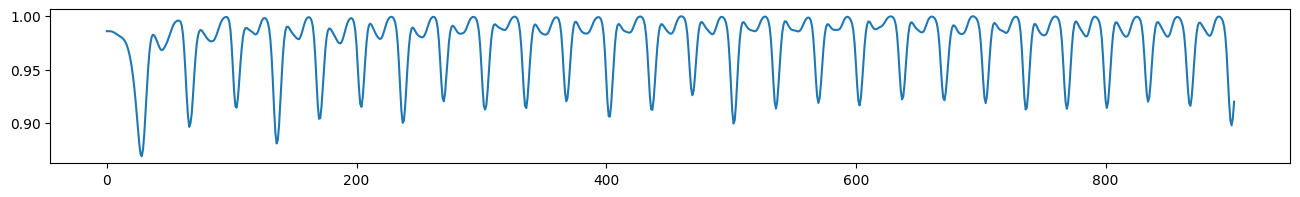

In [4]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt(r'D:\Study\GitHub\2025_Markov_TimeSeriesCourse\practice\06 Chains\datasets\Rotation Matrix.txt')
ax.plot(ts);

In [5]:
m = 25
mp = stumpy.stump(ts, m=m)
s, c = stumpy.allc(mp[:,2], mp[:,3])
c

array([199, 331, 398, 432, 863])

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

**Для нахождения самой длинной цепочки необходимо построить матричный профиль, а затем на основании индексов левого и правого матричных профилей, которые хранят значения о ближайших соседах слева и справа соответственно, находим все цепочки. Из полученных цепочек находим индексы звеньев соответствующих самой длинной цепочки. Исходя из полученных данных, видим, что присутствует 5 звеньев цепочки.**

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

In [6]:
import matplotlib.pyplot as plt

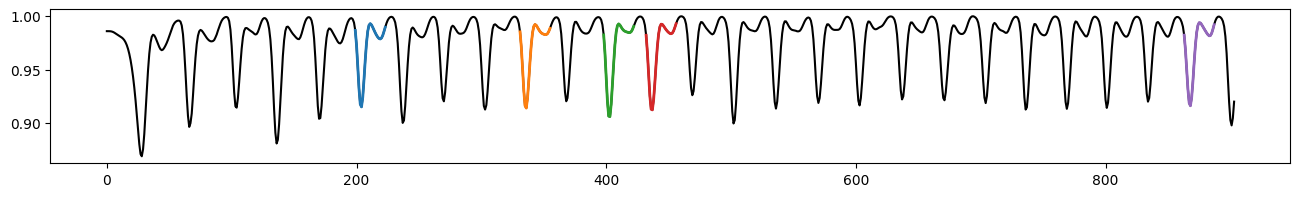

In [7]:
plt.figure(figsize=(16,2))
plt.plot(ts, color='black')

for i in range(c.shape[0]):
    y = ts[c[i]:c[i]+m]
    x = range(c[i], c[i]+m)
    plt.plot(x, y, linewidth=2)
    
plt.show()

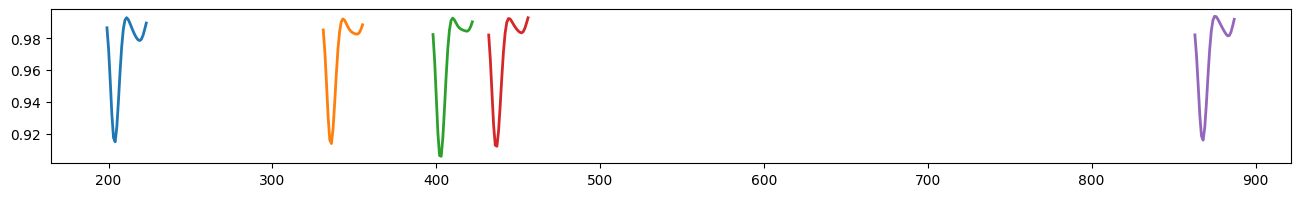

In [8]:
plt.figure(figsize=(16,2))

for i in range(c.shape[0]):
    y = ts[c[i]:c[i]+m]
    x = range(c[i], c[i]+m)
    plt.plot(x, y, linewidth=2)
    
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

**Основываясь на полученных графиках, видим, что звенья на протяжении всего временного ряда сохраняют свою схожесть и практически не меняются. За исключением третьего звена, которое более всего отличается от других.**

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

In [9]:
y1 = ts[c[2]:c[2]+m]
x1 = np.array([i for i in range(c[2], c[2] + m)])

y2 = ts[c[3]:c[3]+m]
x2 = np.array([i for i in range(c[3], c[3] + m)])

y_true = ts[c[4]:c[4]+m]
x_true = np.array([i for i in range(c[4], c[4] + m)])

y3 = y2 + (y2 - y1)
x3 = x2 + (x2 - x1)

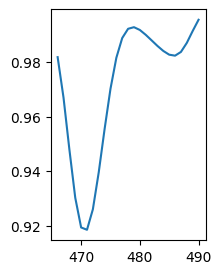

In [10]:
plt.figure(figsize=(2,3))
plt.plot(x3, y3)
plt.show()

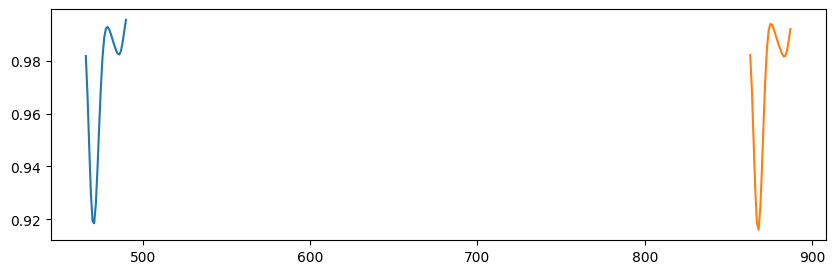

In [11]:
plt.figure(figsize=(10,3))
plt.plot(x3, y3)
plt.plot(x_true, y_true)
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

**Предсказанное звено цепочки оказалось очень похоже на истинное, однако имеет другое положение в ряде.**